In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
#pd.set_option('display.width', 1000)

In [54]:
df = pd.read_csv("train.csv",index_col=0)
df['m_3_missing'] = df.measurement_3.isna()
df['m_4_missing'] = df.measurement_4.isna()
df['m_5_missing'] = df.measurement_5.isna()
df['m_9_missing'] = df.measurement_9.isna()
df['area'] = df['attribute_2']*df['attribute_3']
df['plus01'] = df["measurement_1"]+df["measurement_2"]
df['plus02'] = df["measurement_0"]+df["measurement_2"]
df['plus03'] = df["measurement_0"]+df["measurement_1"]+df["measurement_2"]
df['mean_mean35681011'] = df[['measurement_3','measurement_5','measurement_6','measurement_8','measurement_10','measurement_11','measurement_13','measurement_14','measurement_15','measurement_16']].mean(axis=1)
df['mean_std35681011'] = df[['measurement_3','measurement_5','measurement_6','measurement_8','measurement_10','measurement_11','measurement_13','measurement_14','measurement_15','measurement_16']].std(axis=1)
df['mean_mean49912'] = df[['measurement_4','measurement_7','measurement_9','measurement_12']].mean(axis=1)
df['mean_std47912'] = df[['measurement_4','measurement_7','measurement_9','measurement_12']].std(axis=1)
#df['loading'] = np.log(df["loading"])

f = (df['attribute_0']=='material_7') & (df['attribute_1']=='material_8')
df.loc[f,'material']=1
df.loc[~f,'material']=0
df

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,m_3_missing,m_4_missing,m_5_missing,m_9_missing,area,plus01,plus02,plus03,mean_mean35681011,mean_std35681011,mean_mean49912,mean_std47912,material
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0,False,False,False,False,45,12,11,19,16.603889,2.320475,12.530500,1.929556,1.0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0,False,False,False,False,45,6,17,20,16.775700,1.530751,12.122750,0.569082,1.0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0,False,False,False,False,45,6,17,18,17.145778,1.508934,12.720750,0.876115,1.0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0,False,False,False,False,45,8,19,21,17.213100,1.347949,11.565500,1.209175,1.0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0,False,False,False,False,45,10,17,19,16.569600,2.328895,11.755250,1.168087,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0,False,False,False,True,54,20,10,26,16.650889,2.153871,11.412000,1.643262,0.0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0,False,True,False,False,54,20,18,30,16.730000,2.601039,10.871667,0.554632,0.0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0,False,False,False,False,54,11,2,12,16.534800,1.556405,10.810000,1.430920,0.0


(array([15705.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 10865.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

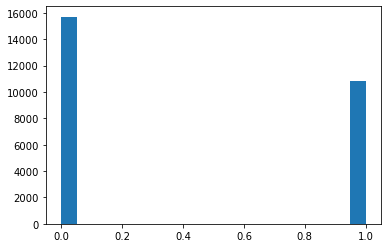

In [55]:
import matplotlib.pyplot as plt
plt.hist(df["material"],bins=20)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("failure",axis=1),df["failure"],test_size=0.2, random_state=42)

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(n_nearest_features=3)
cat = ["product_code","attribute_0","attribute_1",'m_3_missing','m_4_missing','m_5_missing','m_9_missing','material']
non_cat = [k for k in X_train if k not in cat]
X_train_non_cat = X_train[non_cat]
imputer = imputer.fit(X_train_non_cat)
X_train_non_cat_imp= imputer.transform(X_train_non_cat)
X_train_non_cat.iloc[:,:]=X_train_non_cat_imp
X_train_non_cat = X_train_non_cat[["loading","measurement_1","measurement_2","measurement_17",'plus02','mean_mean35681011','mean_std35681011','mean_mean49912','mean_std47912']]
X_test_non_cat = X_test[non_cat]
X_test_non_cat_imp= imputer.transform(X_test_non_cat)
X_test_non_cat.iloc[:,:]=X_test_non_cat_imp
X_test_non_cat = X_test_non_cat[["loading","measurement_1","measurement_2","measurement_17",'plus02','mean_mean35681011','mean_std35681011','mean_mean49912','mean_std47912']]
X_train_cat = X_train[['m_3_missing']]
X_test_cat = X_test[['m_3_missing']]
#y = df_non_cat["failure"]
#df_non_cat = df_non_cat.drop("failure",axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/_0/ycth_cf923q232q48fh0mbl80000gn/T/ipykernel_8448/2521645083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_non_cat.iloc[:,:]=X_train_non_cat_imp
/var/folders/_0/ycth_cf923q232q48fh0mbl80000gn/T/ipykernel_8448/2521645083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_non_cat.iloc[:,:]=X_test_non_cat_

In [58]:
X_train_non_cat

,loading,measurement_1,measurement_2,measurement_17,plus02,mean_mean35681011,mean_std35681011,mean_mean49912,mean_std47912
id,,,,,,,,,
4031,125.77,1.0,3.0,879.008,16.0,16.238400,2.533406,12.24100,1.743671
2375,108.12,8.0,7.0,760.411,21.0,17.197889,1.989766,11.32350,0.246615
13904,190.34,11.0,10.0,675.360,26.0,16.839400,1.113451,11.28600,1.074905
18772,132.96,8.0,5.0,966.597,13.0,18.308222,1.352561,12.00475,0.782696
3884,108.12,5.0,4.0,566.990,15.0,16.950700,2.161062,11.24525,0.458847
...,...,...,...,...,...,...,...,...,...
21575,139.08,9.0,8.0,695.848,15.0,17.342111,2.185551,12.26925,2.298304
5390,156.74,7.0,10.0,773.321,16.0,16.401222,1.801142,12.06275,1.364511
860,115.63,6.0,3.0,851.546,17.0,17.114444,2.187756,11.26850,0.706779


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scalar = sc.fit(X_train_non_cat)
X_train_non_cat = scalar.transform(X_train_non_cat)
X_test_non_cat = scalar.transform(X_test_non_cat)

In [60]:
#from sklearn.manifold import TSNE
#tsne = TSNE(n_components=3, learning_rate='auto',
#                 init='random', perplexity=3)
#tsne = tsne.fit(X_train)
#X_train = tsne.transform(X_train)
#X_test = tsne.transform(X_test)

In [61]:
#from sklearn.decomposition import PCA
#PCA = PCA(n_components=3)
#PCA = PCA.fit(X_train_non_cat)
#X_train_non_cat = PCA.transform(X_train_non_cat)
#X_test_non_cat = PCA.transform(X_test_non_cat)
#PCA.explained_variance_ratio_

In [62]:
X_train = np.concatenate((pd.get_dummies(X_train_cat).values,X_train_non_cat),axis=1)
X_test = np.concatenate((pd.get_dummies(X_test_cat).values,X_test_non_cat),axis=1)

In [63]:
X_train

array([[ 0.        , -0.053522  , -1.72380914, ...,  1.60674972,
         1.01148176,  1.46821487],
       [ 0.        , -0.50825688, -0.06053179, ...,  0.30997579,
        -0.55427558, -1.68635528],
       [ 0.        ,  1.61006051,  0.65230135, ..., -1.78034547,
        -0.61827112,  0.05900389],
       ...,
       [ 0.        , -0.31476912, -0.53575389, ...,  0.78225103,
        -0.6481357 , -0.71670494],
       [ 0.        ,  2.2778638 , -0.53575389, ...,  0.04432012,
        -1.01845651,  0.87010363],
       [ 0.        , -0.18543376, -0.06053179, ...,  0.36046063,
         0.75933937,  1.4149376 ]])

In [64]:
#logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV


p_grid ={"penalty":['l2'],
        "solver":["liblinear"]}
log = LogisticRegression()
log_cv_results = GridSearchCV(log,param_grid=p_grid, cv=4)


model_log = log_cv_results.fit(X_train,y_train)
model_log.score(X_test,y_test)
#nested_scores_log = cross_val_score(estimator = cv_results,X =X,y=y,cv=4)
#log = LogisticRegression()
#model = cv_results.fit(**best_iteration_,X,y)
#y_log_prob = model.predict_proba(X)
#y_log = model.predict(X)

0.801091456529921

In [65]:
pd.DataFrame(model_log.predict(X_test)).value_counts()

0    5300
1      14
dtype: int64

In [66]:
(model_log.predict_proba(X_test)[:,1]>0.5).sum()

14

In [67]:
#GaussianNB

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB

p_grid ={}

GNB = GaussianNB()
GNB_cv_results = GridSearchCV(GNB,param_grid=p_grid, cv=4)
modelGNB = GNB_cv_results.fit(X_train,y_train)
#nested_scores_GNB = cross_val_score(estimator = cv_results,X =X,y=y,cv=4)
modelGNB.score(X_test,y_test)

#model_GNB = cv_results.fit(X,y)
#model_GNB.score(X,y)
#y_GNB_prob = model_GNB.predict_proba(X)
#y_GNB_prob
#y_GNB = model_GNB.predict(X)

0.7941287165976666

In [68]:
pd.DataFrame(modelGNB.predict(X_test)).value_counts()

0    5177
1     137
dtype: int64

In [69]:
(modelGNB.predict_proba(X_test)[:,1]>0.5).sum()

137

In [70]:
from sklearn.ensemble import RandomForestClassifier

p_grid ={'max_depth':[2,3],
        'n_estimators':[100]}
RF = RandomForestClassifier()
RF_cv_results = GridSearchCV(RF,param_grid=p_grid, cv=4)
#nested_scores_RF = cross_val_score(estimator = cv_results,X =X,y=y,cv=4)

model_RF = RF_cv_results.fit(X_train,y_train)
model_RF.score(X_test,y_test)
#y_RF_prob = model_RF.predict_proba(X)
#y_RF_prob
#y_RF = model_RF.predict(X)

0.801091456529921

In [71]:
pd.DataFrame(model_RF.predict(X_test)).value_counts()

0    5314
dtype: int64

In [81]:
#lgbm
from lightgbm import LGBMClassifier
#p_grid={"max_depth":[2,3],
#       "n_estimators":[20,50,100,200],
#       "min_child_samples":[3,4,5]}
lgb = LGBMClassifier(n_estimators=8000,
                     early_stopping=100,
                     learning_rate = 0.01,
                     max_depth=3,
                     min_child_samples=10,
                     num_leaves=4,
                     reg_alpha=0.01,
                     reg_lambda=0.01
                    )
#cv_results = GridSearchCV(lgb,param_grid=p_grid, cv=4)
#nested_scores_lgb = cross_val_score(estimator = cv_results,X =X,y=y,cv=4)

model_lgb = lgb.fit(X_train,y_train,
                    eval_set=[(X_train,y_train),(X_test,y_test)],
                    verbose=100)
model_lgb.score(X_test,y_test)
#y_lgb_prob = model_lgb.predict_proba(X)
#y_lgb_prob
#y_lgb = model_lgb.predict(X)

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.514447	valid_1's binary_logloss: 0.493197
[200]	training's binary_logloss: 0.512569	valid_1's binary_logloss: 0.492028
[300]	training's binary_logloss: 0.511507	valid_1's binary_logloss: 0.491701
[400]	training's binary_logloss: 0.510589	valid_1's binary_logloss: 0.491532
[500]	training's binary_logloss: 0.509763	valid_1's binary_logloss: 0.49152
[600]	training's binary_logloss: 0.509017	valid_1's binary_logloss: 0.491433
[700]	training's binary_logloss: 0.508323	valid_1's binary_logloss: 0.491406
[800]	training's binary_logloss: 0.507637	valid_1's binary_logloss: 0.491418
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.507857	valid_1's binary_logloss: 0.491392


0.801091456529921

In [82]:
pd.DataFrame(model_lgb.predict(X_test)).value_counts()

0    5314
dtype: int64

In [80]:
y_test.value_counts()

0    4257
1    1057
Name: failure, dtype: int64

In [1250]:
model_lgb.feature_importances_


array([ 150, 1091,   93,  225,  437,  128,  295,   65,  178,   20],
      dtype=int32)

In [1251]:
(model_lgb.predict_proba(X_train,num_iteration=model_lgb.best_iteration_)[:,1]>0.5).sum()

0

In [1209]:
X_train

array([[ 0.        ,  0.09466006, -1.72380914, ...,  1.60674972,
         1.01148176,  1.46821048],
       [ 0.        , -0.41504643, -0.06053179, ...,  0.30997579,
        -0.55427558, -1.68635938],
       [ 0.        ,  1.4913676 ,  0.65230135, ..., -1.78034547,
        -0.61827112,  0.05899962],
       ...,
       [ 0.        , -0.18868588, -0.53575389, ...,  0.78225103,
        -0.6481357 , -0.71670913],
       [ 0.        ,  1.92171348, -0.53575389, ...,  0.04432012,
        -1.01845651,  0.87009929],
       [ 0.        , -0.04543319, -0.06053179, ...,  0.36046063,
         0.75933937,  1.41493322]])

In [1211]:


df_test = pd.read_csv("test.csv",index_col=0)
df_test['m_3_missing'] = df_test.measurement_3.isna()
df_test['m_5_missing'] = df_test.measurement_5.isna()
df_test['m_4_missing'] = df_test.measurement_4.isna()
df_test['m_9_missing'] = df_test.measurement_9.isna()

df_test['area'] = df_test['attribute_2']*df_test['attribute_3']
df_test['plus01'] = df_test["measurement_0"]+df_test["measurement_1"]
df_test['plus02'] = df_test["measurement_0"]+df_test["measurement_2"]
df_test['plus03'] = df_test["measurement_0"]+df_test["measurement_1"]+df["measurement_2"]
df_test['mean_mean35681011'] = df_test[['measurement_3','measurement_5','measurement_6','measurement_8','measurement_10','measurement_11','measurement_13','measurement_14','measurement_15','measurement_16']].mean(axis=1)
df_test['mean_std35681011'] = df_test[['measurement_3','measurement_5','measurement_6','measurement_8','measurement_10','measurement_11','measurement_13','measurement_14','measurement_15','measurement_16']].std(axis=1)
df_test['mean_mean49912'] = df_test[['measurement_4','measurement_7','measurement_9','measurement_12']].mean(axis=1)
df_test['mean_std47912'] = df_test[['measurement_4','measurement_7','measurement_9','measurement_12']].std(axis=1)

df_test['loading'] = np.log(df_test["loading"])
f = (df_test['attribute_0']=='material_7') & (df_test['attribute_1']=='material_8')
df_test.loc[f,'material']=1
df_test.loc[~f,'material']=0

cat = ["product_code","attribute_0","attribute_1",'m_3_missing','m_4_missing','m_5_missing','m_9_missing','material']
non_cat = [k for k in df_test if k not in cat]
df_test_non_cat = df_test[non_cat]
df_test_non_cat_imp= imputer.transform(df_test_non_cat)
df_test_non_cat.iloc[:,:]=df_test_non_cat_imp
df_test_non_cat = df_test_non_cat[["loading","measurement_1","measurement_2","measurement_17",'plus02','area','mean_mean35681011','mean_std35681011','mean_mean49912','mean_std47912']]
df_test_cat = df_test[['m_3_missing']]
#df_test_non_cat = imputer.transform(df_test_non_cat)
df_test_non_cat = sc.transform(df_test_non_cat)
#df_test_non_cat = PCA.transform(df_test_non_cat)
X_test = np.concatenate((pd.get_dummies(df_test_cat).values,df_test_non_cat),axis=1)

/var/folders/_0/ycth_cf923q232q48fh0mbl80000gn/T/ipykernel_50568/3220575207.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_non_cat.iloc[:,:]=df_test_non_cat_imp


In [1212]:
pd.DataFrame((model_log.predict_proba(X_test)+model_RF.predict_proba(X_test)+model_lgb.predict_proba(X_test,num_iteration=model_lgb.best_iteration_)+modelGNB.predict_proba(X_test))/4).to_csv("essem4.csv")

In [1213]:
pd.DataFrame(model_lgb.predict_proba(X_train)).to_csv("boost.csv")

In [734]:
X_test

array([[ 0.        ,  0.        , -0.21326027, ..., -2.35647468,
        -2.72122619, -0.01901651],
       [ 0.        ,  0.        , -0.36939028, ..., -2.35647468,
        -2.74661801, -0.37742816],
       [ 0.        ,  0.        , -0.40417172, ..., -2.35647468,
        -2.73137843,  0.09247278],
       ...,
       [ 0.        ,  1.        , -1.54886751, ..., -0.26772028,
        -2.68175294,  0.77640036],
       [ 0.        ,  0.        , -0.04373296, ..., -0.26772028,
        -2.71572965,  0.48314567],
       [ 0.        ,  0.        , -1.07893163, ..., -0.26772028,
        -2.71134835,  0.04102139]])

In [735]:
X_train

array([[ 0.        ,  0.        , -0.05352329, ..., -0.26772028,
         1.09444168,  1.09759336],
       [ 0.        ,  0.        , -0.5082584 , ..., -0.26772028,
         0.57386766,  0.55851115],
       [ 0.        ,  0.        ,  1.61006004, ..., -0.76504275,
        -0.00520723,  0.07680884],
       ...,
       [ 0.        ,  0.        , -0.31477054, ..., -0.26772028,
         0.97289372,  0.97291127],
       [ 0.        ,  0.        ,  2.27786366, ..., -0.76504275,
        -0.44643365, -0.38990352],
       [ 0.        ,  0.        , -0.18543512, ...,  0.62746018,
         0.47979031,  0.56759904]])

In [1170]:
(model_RF.predict_proba(X_test)[:,1]>0.4).sum()

0

In [1235]:
(model_lgb.predict_proba(X_train,num_iteration=model_lgb.best_iteration_)[:,1]>0.5).sum()

0

In [1144]:
model_log.predict_proba(X_test)

array([[0.79005641, 0.20994359],
       [0.82325907, 0.17674093],
       [0.80356758, 0.19643242],
       ...,
       [0.87380955, 0.12619045],
       [0.76547225, 0.23452775],
       [0.83669245, 0.16330755]])

In [1145]:
modelGNB.predict_proba(X_test)

array([[0.77295519, 0.22704481],
       [0.80108793, 0.19891207],
       [0.7898728 , 0.2101272 ],
       ...,
       [0.83783161, 0.16216839],
       [0.69947884, 0.30052116],
       [0.79742644, 0.20257356]])